In [11]:
# 日本語フォントをダウンロードする。
!apt-get -y install fonts-ipafont-gothic

# キャッシュを削除する。
# !rm /root/.cache/matplotlib/fontList.json　# 旧cache
!rm /root/.cache/matplotlib/fontlist-v300.json # 消すべきcache

# ランタイムを再起動する。

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (37.7 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

In [3]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='IPAGothic')

In [0]:
file = 'drive/My Drive/data/Throughput.csv'
df = pd.read_csv(file, parse_dates=True, names=('Date', 'Mbps'),index_col='Date')
data = df/1000

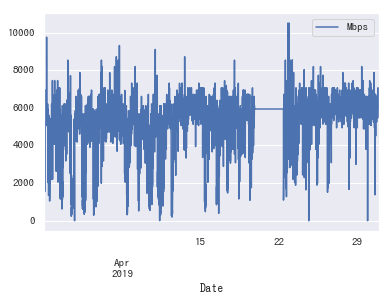

In [3]:
df.plot()

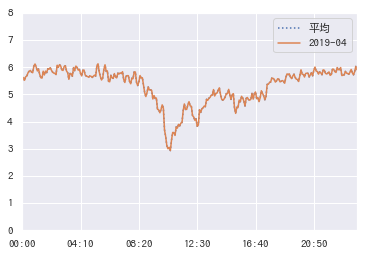

In [4]:
#月毎かつ同一時刻の平均を集計するためにマルチインデックス（階層型インデックス）の用意
hhmm = data.index.format(formatter=lambda x: x.strftime('%H:%M'))
yymm = data.index.format(formatter=lambda x: x.strftime('%Y-%m'))
m_index = pd.MultiIndex.from_arrays([data.index, yymm, hhmm])
data_m = data.copy()
data_m.index = m_index
#グラフ描画
data_gby = data_m.groupby(level=2).mean()
data_gby.columns = ['平均']
#df0=data_gby
ax = data_gby.plot(ylim=[0,8], linestyle="dotted")
for i in sorted(set(yymm)):
     #print(i)
     data_gby_m = data_m.loc[i].groupby(level=2).mean()
     #print(data_gby_m)
     data_gby_m.columns = [i]
     data_gby_m.plot(ax=ax)
     #df0 = pd.concat([df0, data_gby_m], axis=1)